#### Data wrangling
it involves filtering and sorting data frames, feature engineering ,grouping and aggregation, merging and joining data frames, data visualization

In [3]:
import pandas as pd
titanic= pd.read_csv(r"tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic = titanic.drop("Cabin", axis=1)


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [7]:
#filter data -- use comparison operators and boolean indexing
#filter adults age> 18

adults =titanic[titanic["Age"]>=18]
adults.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [8]:
titanic["Age"].mean()

np.float64(30.272590361445783)

In [9]:
adults["Age"].mean()

np.float64(33.2319587628866)

In [10]:
#only males from the table
males = titanic[titanic["Sex"] == "male"]
males.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S


In [11]:
titanic["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [12]:
q= titanic[titanic["Embarked"]=="Q"]
q.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
16,908,0,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,Q
47,939,0,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,Q


In [13]:
#Sorting data
#use sort_values() - it has two parameters by and ascending
#by column Asc (True) or Desc (False)
titanic = titanic.sort_values(by="Fare",ascending = True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,S
372,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,S
21,913,0,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,S
133,1025,0,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,C
116,1008,0,3,"Thomas, Mr. John",male,NaN,0,0,2681,6.4375,C


In [14]:
titanic = titanic.sort_values(by="Fare",ascending = False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C
375,1267,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,C


In [15]:
# Feature engineering
#creating new columns that help improve analysing models

titanic["Age_group"]= pd.cut(titanic["Age"],bins= [0,12,19,59,100],labels =["child","teen","adult","senior"])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,adult
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S,senior
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S,adult
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C,adult
375,1267,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,C,adult


In [16]:
#Extracting titles from name
titanic["Title"]=titanic["Name"].apply(lambda name: name.split(",")[1].split(".")[0].strip())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group,Title
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,adult,Mrs
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S,senior,Mrs
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S,adult,Miss
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,C,adult,Miss
375,1267,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,C,adult,Miss


In [20]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_group', 'Title'],
      dtype='object')

#### Grouping and aggregation
- uses the  group by and aggregate method


In [27]:
#count of people who survived
grouped = titanic.groupby("Pclass")["Survived"].agg("count")
print(grouped)

Pclass
1    107
2     93
3    218
Name: Survived, dtype: int64


In [38]:
#Merging data frames
dict1={
    "id":[1,2,3,4,5],
    "name":["Jay", "Pei", "Jay J", "Aunty", "Unko"]
}

In [39]:
dict2={
    "id":[1,2,3,4,5],
    "Fruits":["Orange", "Mangoes", "apples", "guava", "bananas"]
}

In [40]:
import pandas as pd
data1=pd.DataFrame(dict1)
data1.head()

,id,name
0,1,Jay
1,2,Pei
2,3,Jay J
3,4,Aunty
4,5,Unko


In [41]:

data2=pd.DataFrame(dict2)
data1.head()

,id,name
0,1,Jay
1,2,Pei
2,3,Jay J
3,4,Aunty
4,5,Unko


In [44]:
merged= pd.merge(data1, data2,on="id",how="inner")
merged.head()

,id,name,Fruits
0,1,Jay,Orange
1,2,Pei,Mangoes
2,3,Jay J,apples
3,4,Aunty,guava
4,5,Unko,bananas


# Data visualiztion
uses 
matplotlib-  usual visualizations
searborn - has statistical visuals e,g linecharts etc
plotlib- 



In [49]:
import matplotlib.pyplot as plt

x=[1,2,3,4,5]
y=[3,4,5,6,7]

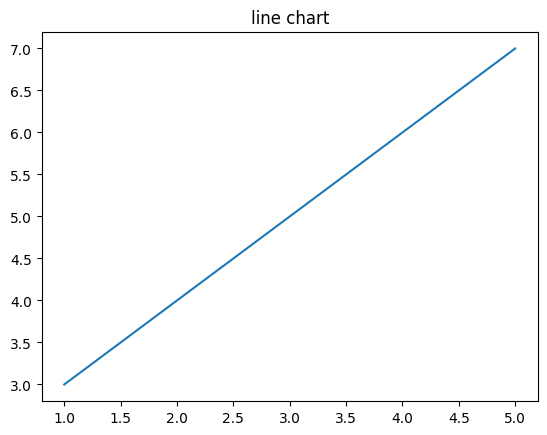

In [50]:
plt.plot(x,y)
plt.title("line chart")
plt.show()

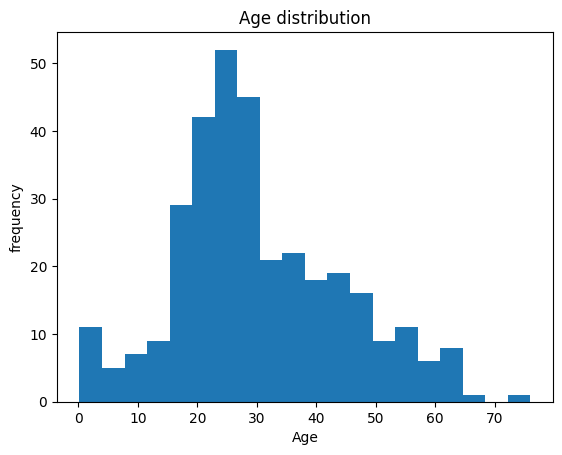

In [51]:
# A histogram visualisaton of age distribution 
plt.hist(titanic["Age"],bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

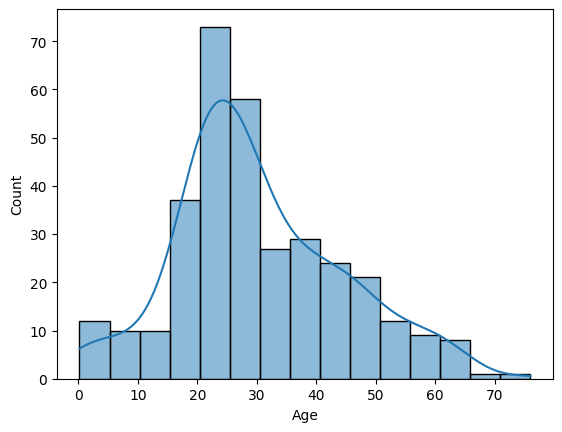

In [56]:
import seaborn as sns
sns.histplot(titanic, x="Age", kde=True)

<Axes: xlabel='Pclass', ylabel='Age'>

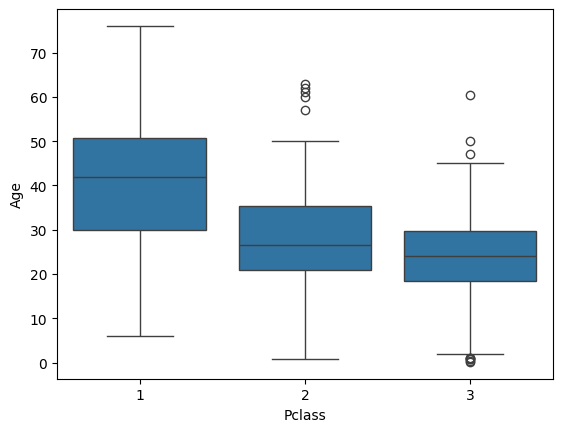

In [59]:
#Box plot(works with numeric columns)
#asists in distributions
sns.boxplot(data=titanic, x="Pclass", y="Age")


<Axes: xlabel='Pclass', ylabel='count'>

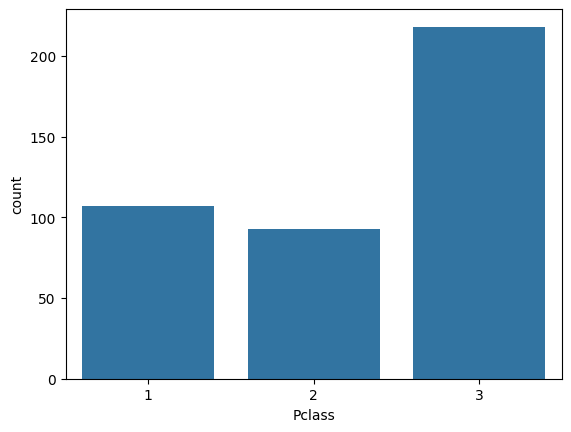

In [60]:
#Count plot 
sns.countplot(data=titanic,x="Pclass")

<Axes: xlabel='Pclass', ylabel='Fare'>

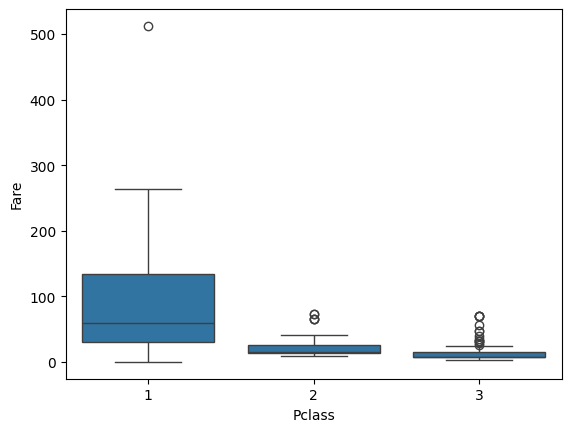

In [63]:
sns.boxplot(data=titanic, x="Pclass", y="Fare")